# Final Exam (part 1) - Computational Physics 2

### Deadline: Friday 6 June 2025 (by 23h59)
### Credits: 10 points

### Name: Alan Palma Travez

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.


## 1. Finite-difference method for quantum mechanics: Wave packets in a Parabolic Potential

Consider a quantum mechanical particle of mass $m$ constrained to move along the x-axis. Its dynamics are governed by the **time-dependent Schrödinger equation**:

$$i\hbar \frac{\partial \Psi(x,t)}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \Psi(x,t)}{\partial x^2} + V(x) \Psi(x,t)$$

where $\Psi(x,t)$ represents the quantum state of the particle, $\hbar$ is the reduced Planck constant, $m$ is the mass of the particle, and $V(x) = \frac{1}{2} m \omega^2 x^2$ is the one-dimensional quantum harmonic oscillator potential with $\omega$ representing the angular frequency of the oscillator.

### Initial Conditions:

At time $t=0$, you will explore two different initial wavefunctions for the particle:

1.  **Single Gaussian Wave Packet:** A localized wave packet with an initial momentum:

$$\Psi(x,0) = A e^{-\frac{(x-x_0)^2}{2\sigma^2}} e^{i p_0 x / \hbar}$$

where $x_0$ is the initial position, $\sigma$ is the width, and $p_0$ is the initial momentum. $A$ is a normalization constant.

2.  **Superposition of Two Gaussian Wave Packets:** It is formed by the sum of two distinct Gaussian wave packets:

$$\Psi(x,0) = A_1 e^{-\frac{(x-x_{0,1})^2}{2\sigma_1^2}} e^{i p_{0,1} x / \hbar} + A_2 e^{-\frac{(x-x_{0,2})^2}{2\sigma_2^2}} e^{i p_{0,2} x / \hbar}$$

where $x_{0,k}$ are initial positions, $\sigma_k$ are widths, $p_{0,k}$ are initial momenta for each packet, and $A_k$ are constants adjusted such that the total wavefunction $\Psi(x,0)$ is **normalised**, meaning $\int_{-\infty}^{\infty} |\Psi(x,0)|^2 dx = 1$.

### Boundary Conditions:

You will simulate the particle in a finite spatial domain, $[-L_x/2, L_x/2]$. At the boundaries of this domain, we will apply **Dirichlet boundary conditions**, meaning the wavefunction is identically zero: $\Psi(-L_x/2, t) = \Psi(L_x/2, t) = 0$.


### Tasks

Your goal is to develop and implement a numerical algorithm to solve the time-dependent Schrödinger equation using the **Crank-Nicolson method** that we reviewed in class:

#### (a) Mathematical derivation:

In a markdown cell, derive the discrete form of the time-dependent Schrödinger equation using the **Crank-Nicolson method**.

- Begin by discretising the spatial domain ($x_j = j \Delta x$) and time ($t_n = n \Delta t$).

- Use a central finite difference approximation for the second spatial derivative. Your derivation should lead to a matrix equation of the form $\mathbf{A} \Psi^{n+1} = \mathbf{B} \Psi^n$, where $\Psi^{n+1}$ and $\Psi^n$ are vectors of the wavefunction at interior grid points.

- Clearly define the elements of the tridiagonal matrices $\mathbf{A}$ and $\mathbf{B}$ in terms of $\hbar$, $m$, $\Delta x$, $\Delta t$, and $V_j$.

- Show how the discrete Hamiltonian operator $\mathbf{H}$ is represented within these matrices.

Lets begin discretasing the time domain: 
$$
\frac{\partial \Psi(x,t)}{\partial t} = \frac{\Psi_j^{n+1}-\Psi_j^n}{\Delta t}.
$$
Then, the spatial domain:
$$
\frac{\partial^2 \Psi(x,t)}{\partial x^2}= \frac{1}{2}\left(\frac{\Psi_{j+1}^{n}-2 \Psi_j^{n}+\Psi_{j-1}^{n}}{\Delta x^2}+ \frac{\Psi_{j+1}^{n+1}-2 \Psi_j^{n+1}+\Psi_{j-1}^{n+1}}{\Delta x^2}\right).
$$

Now, replace this in the **time-dependent Schrödinger equation**:

$$
i \hbar\left(\frac{\Psi_j^{n+1}-\Psi_j^n}{\Delta t}\right)=-\frac{\hbar^2}{4 m} \left(\frac{\Psi_{j+1}^{n}-2 \Psi_j^{n}+\Psi_{j-1}^{n}}{\Delta x^2}+ \frac{\Psi_{j+1}^{n+1}-2 \Psi_j^{n+1}+\Psi_{j-1}^{n+1}}{\Delta x^2} \right)+\frac{1}{2}V_j(\Psi_j^n+\Psi_j^{n+1})

\\

\Psi_j^{n+1}=-\frac{\hbar \Delta t}{4 i m \Delta x^2}\left(\Psi_{j+1}^{n}-2 \Psi_j^{n}+\Psi_{j-1}^{n} + \Psi_{j+1}^{n+1}-2 \Psi_j^{n+1}+\Psi_{j-1}^{n+1}\right)+\Psi_j^n+V_j \frac{\Delta t}{2 i \hbar} (\Psi_j^n + \Psi_j^{n+1}) 

\\

\Psi_j^{n+1} -\frac{ i\hbar \Delta t}{4 m \Delta x^2} \left(\Psi_{j+1}^{n+1}-2 \Psi_j^{n+1}+\Psi_{j-1}^{n+1}\right) - V_j \frac{\Delta t}{2 i \hbar} \Psi_j^{n+1} =\frac{i \hbar \Delta t}{4 m \Delta x^2}\left(\Psi_{j+1}^{n}-2 \Psi_j^{n}+\Psi_{j-1}^{n} \right)+\Psi_j^n+V_j \frac{\Delta t}{ 2 i \hbar} \Psi_j^n 

\\

-\frac{i \hbar \Delta t}{4 m \Delta x^2} \Psi_{j-1}^{n+1}+\left(1+\frac{i \hbar \Delta t}{2 m \Delta x^2} + \frac{i V_j \Delta t}{2 \hbar}\right) \Psi_j^{n+1}-\frac{i \hbar \Delta t}{4 m \Delta x^2} \Psi_{j+1}^{n+1}=\frac{i \hbar \Delta t}{4 m \Delta x^2} \Psi_{j-1}^n+\left(1-\frac{i \hbar \Delta t}{2 m \Delta x^2} -\frac{i V_j \Delta t}{2 \hbar}\right) \Psi_j^n+\frac{i \hbar \Delta t}{4 m \Delta x^2} \Psi_{j+1}^n 

\\

-\frac{\hbar \Delta t}{4 m \Delta x^2} \Psi_{j-1}^{n+1}+\left(-i+\frac{\hbar \Delta t}{2 m \Delta x^2} + \frac{V_j \Delta t}{2 \hbar} \right) \Psi_j^{n+1}-\frac{\hbar \Delta t}{4 m \Delta x^2} \Psi_{j+1}^{n+1}=\frac{\hbar \Delta t}{4 m \Delta x^2} \Psi_{j-1}^n+\left(-i-\frac{\hbar \Delta t}{2 m \Delta x^2}-\frac{V_j \Delta t}{2 \hbar}\right) \Psi_j^n+\frac{\hbar \Delta t}{4 m \Delta x^2} \Psi_{j+1}^n.
$$


Define $r$ and $d_j$ as follow:
$$
r =\frac{\hbar \Delta t}{4 m \Delta x^2}, d_j=\frac{V_j \Delta t}{2 \hbar}.
$$ 
 
Therfore, the discretised queation is:

$$
r \Psi_{j-1}^{n+1}+(i-2r-d_j) \Psi_j^{n+1}+r \Psi_{j+1}^{n+1}=-r \Psi_{j-1}^n+\left(i+2 r+d_j\right) \Psi_j^n-r \Psi_{j+1}^n.
$$

In matrix form:

$$
\begin{bmatrix}
(i-2r-d_1) & r & 0 & \cdots & 0 \\
r & (i-2r-d_2) & r & \cdots & 0 \\
0 & \cdots & \cdots & \cdots & 0\\
\cdots & 0& r & (i-2r-d_{N_x-3})& r \\
0 &\cdots & 0 & r & (i-2r-d_{N_x-2}) \\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
\Psi_{j-1}^{n+1} \\
\Psi_{j}^{n+1}  \\
\Psi_{j+1}^{n+1}  \\
\cdots \\
\end{bmatrix}=
\begin{bmatrix}
(i+2r+d_1) & -r & 0 & \cdots & 0 \\
-r & (i+2r+d_2) & -r & \cdots & 0 \\
0 & \cdots & \cdots & \cdots & 0\\
\cdots & 0& -r & (i+2r+d_{N_x-3})& -r \\
0 &\cdots & 0 & -r & (i+2r+d_{N_x-2})\\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
\Psi_{j-1}^{n} \\
\Psi_{j}^{n}  \\
\Psi_{j+1}^{n}  \\
\cdots \\
\end{bmatrix}
$$

$$
 \mathbf{A} \Psi_j^{n+1}= \mathbf{B}\Psi_j^n
$$

Finally, the Hamiltonian operator can be expressed in function of $\mathbf{A}$ and $\mathbf{B}$ matrices:
$$
i \hbar \frac{\partial \Psi}{\partial t}=\hat{H} \Psi \\
i \hbar\left(\frac{\Psi^{n+1}-\Psi^n}{\Delta t}\right)=\hat{H} \frac{1}{2}\left(\Psi^{n+1}+\Psi^n\right), \\
\Psi^{n+1}=-\frac{i \Delta t}{2 \hbar} \hat{H} \Psi^n-\frac{i \Delta t}{2 \hbar} \hat{H} \Psi^{n+1}+\Psi^n, \\
\Psi^{n+1}+\frac{i \Delta t}{2 \hbar} \hat{H} \Psi^{n+1}=\left(-\frac{i \Delta t}{2 \hbar} \hat{H}+I\right) \Psi^n, \\
\left(I+\frac{i \Delta t}{2 \hbar} \hat{H}\right) \Psi^{n+1}=\left(I-\frac{i \Delta t}{2 \hbar} \hat{H}\right) \Psi^n.
$$

Therefore,

$$
\mathbf{A} = \left(I+\frac{i \Delta t}{2 \hbar} \hat{H}\right)
$$

, and 

$$
\mathbf{B} = \left(I-\frac{i \Delta t}{2 \hbar} \hat{H}\right).


#### (b) Python code implementation:

Use **python classes** to implement the numerical solution to the time-dependent Schrödinger equation. You will need to:

- Set up the physical constants, simulation parameters, spatial and temporal grids, and the potential. The simulation should be conducted using atomic units, where $\hbar = 1$ and $m = 1$. This simplifies the equations without loss of generality.

- Implement the initial conditions described above ensuring the proper normalisation of the initial wavefunctions. Remember that the wavefunction $\Psi$ is complex, so you should ensure that all calculations involving $\Psi$ handle complex numbers correctly.

- Construct the tridiagonal matrices $\mathbf{A}$ and $\mathbf{B}$ based on your derivations. Pay close attention to the boundary conditions. **Hint:** Use sparse matrices for computational efficiency.

- Implement a time evolution loop. At each time step, calculate the RHS vector $\mathbf{B} \Psi^n$. Solve the linear system $\mathbf{A} \Psi^{n+1} = (\text{RHS vector})$, and update the wavefunction array $\Psi$ for the next iteration, remembering to apply the boundary conditions.

In general, it should be important to consider the boundaries conditions which are fixed, so we need to correct the boundary values. Here is explain in matrix form:


$$
\begin{bmatrix}
(i-2r-d_1) & r & 0 & \cdots & 0 \\
r & (i-2r - d_2) & r & \cdots & 0 \\
0 & \cdots & \cdots & \cdots & 0\\
\cdots & 0& r & (i-2r - d_{N_x-3})& r \\
0 &\cdots & 0 & r & (i-2r - d_{N_x-2}) \\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
\Psi_{j-1}^{n+1} \\
\Psi_{j}^{n+1}  \\
\Psi_{j+1}^{n+1}  \\
\cdots \\
\end{bmatrix} 

+
\begin{bmatrix}
r \Psi_{0}^{n+1} \\
0\\
\cdots  \\
0 \\
r \Psi_{N_{x}}^{n+1}
\end{bmatrix} 


=
\begin{bmatrix}
(i+2r+d_1) & -r & 0 & \cdots & 0 \\
-r & (i+2r+d_2) & -r & \cdots & 0 \\
0 & \cdots & \cdots & \cdots & 0\\
\cdots & 0& -r & (i+2r+d_{N_x-3})& -r \\
0 &\cdots & 0 & -r & (i+2r+d_{N_x-2})\\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
\Psi_{j-1}^{n} \\
\Psi_{j}^{n}  \\
\Psi_{j+1}^{n}  \\
\cdots \\
\end{bmatrix}


+
\begin{bmatrix}
-r \Psi_{0}^{n} \\
0\\
\cdots  \\
0 \\
-r \Psi_{N_{x}}^{n}
\end{bmatrix} 
$$

$$
\begin{bmatrix}
(i-2r-d_1) & r & 0 & \cdots & 0 \\
r & (i-2r-d_2) & r & \cdots & 0 \\
0 & \cdots & \cdots & \cdots & 0\\
\cdots & 0& r & (i-2r-d_{N_x-3})& r \\
0 &\cdots & 0 & r & (i-2r-d_{N_x-2}) \\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
\Psi_{j-1}^{n+1} \\
\Psi_{j}^{n+1}  \\
\Psi_{j+1}^{n+1}  \\
\cdots \\
\end{bmatrix} 

=
\begin{bmatrix}
(i+2r+d_1) & -r & 0 & \cdots & 0 \\
-r & (i+2r+d_2) & -r & \cdots & 0 \\
0 & \cdots & \cdots & \cdots & 0\\
\cdots & 0& -r & (i+2r+d_{N_x-3})& -r \\
0 &\cdots & 0 & -r & (i+2r+d_{N_x-2})\\
\end{bmatrix}
\begin{bmatrix}
\cdots \\
\Psi_{j-1}^{n} \\
\Psi_{j}^{n}  \\
\Psi_{j+1}^{n}  \\
\cdots \\
\end{bmatrix}


-

\begin{bmatrix}
r (\Psi_{0}^{n} + \Psi_{0}^{n+1}) \\
0\\
\cdots  \\
0 \\
r (\Psi_{N_{x}}^{n} + \Psi_{N_x}^{n+1})
\end{bmatrix} 
$$

However, as our boundary contions are fixed in zero, there is no reason to consider this aditional vector. It is zero.

In [1]:
# Third party libraries

import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_matrix
import os
import multiprocessing as mp
import glob
from PIL import Image 

# Define the style for plotting
plt.style.use(['science', 'notebook', 'no-latex']) 

In [2]:
class QuantumSimulator:
    """
    A class to setup the time dependent Schrodinger equation to solve with the Cranck-Nicolson method.
    """

    def __init__(self,  Lx = 20, Nx = 500, dt = 0.01, total_time = 10, omega = 1.0):
        """
        Initialize the solver with physical constants and numerical parameters.
            Inputs:
                hbar (float): Reduced Planck's constant.
                m (float): Mass of the particle.
                dt (float): Time step for the simulation.
                dx (float): Spatial step for the simulation.
        """
         # Physical constants (atomic units)
        self.hbar = 1.0
        self.m = 1.0
        
        # Simulation parameters
        self.Lx = Lx
        self.Nx = Nx
        self.dx = Lx / (Nx - 1)
        self.x = np.linspace(-Lx/2, Lx/2, Nx)
        
        # Time parameters
        self.dt = dt
        self.total_time = total_time
        self.Nt = int(total_time / dt)
        
        # Potential parameters
        self.omega = omega
        self.V = 0.5 * self.m * omega**2 * self.x**2

        # Create solution array
        self.psi = np.zeros((self.Nx, self.Nt), dtype=complex)

        # Set boundary conditions
        bcs = [0.j + 0., 0.j + 0.]

        self.psi[0, :] = bcs[0]
        self.psi[-1, :] = bcs[1]

        # Initialize matrices
        self.setup_matrices()

    def setup_matrices(self):
        """
        Construct the A and B matrices for solving Schrodinger equation with the Crank-Nicolson scheme.
        A Psi(n+1) = B Psi(n)
        """    

        self.r_factor = self.hbar * self.dt / (4 * self.m * self.dx**2)
        d_factor = (self.V * self.dt)/ (2 * self.hbar) 

        # Diagonals 
        main_diag_A = (1j - 2*self.r_factor) * np.ones(self.Nx - 2) - d_factor[1:-1]# (i -2 r - d_j)
        main_diag_B = (1j + 2*self.r_factor)* np.ones(self.Nx - 2) + d_factor[1:-1] # (1 + 2r + d_j)

        # Other diagonals terms
        other_diag = self.r_factor * np.ones(self.Nx - 2)

        # Build the matrices
        A_matrix = diags([other_diag, main_diag_A, other_diag], [-1, 0, 1], shape=(self.Nx-2, self.Nx-2), format='csc')
        B_matrix = diags([-other_diag, main_diag_B, -other_diag], [-1, 0, 1], shape=(self.Nx-2, self.Nx-2), format='csc')

        # print(A_matrix.toarray())
        # print(B_matrix.toarray())

        # Store the matrices
        self.A_matrix = A_matrix
        self.B_matrix = B_matrix

    def set_initial_condition(self, type="single", params=None):
        """
        Set initial wavefunction conditions depending on the type of wavepacket.
            Inputs:
                type (str): 'single' for single Gaussian or 'double' for superposition of two wave packets.
                params (dict): Parameters for initial wavepackets.
        """

        if type == "Single":
            # Parameters for single Gaussian packet
            x0 = params["x0"]
            sigma = params["sigma"]
            p0 = params["p0"]
            
            # Gaussian wavepacket
            psi = np.exp(-(self.x-x0)**2/(2*sigma**2)) * np.exp(1j*p0*self.x/self.hbar)
            
        elif type == "Double":
            # Parameters for two Gaussian packets
            x0_1 = params["x0_1"]
            x0_2 = params["x0_2"]
            sigma1 = params["sigma1"]
            sigma2 = params["sigma2"]
            p0_1 = params["p0_1"]
            p0_2 = params["p0_2"]
            
            # Superposition
            psi1 = np.exp(-(self.x-x0_1)**2/(2*sigma1**2)) * np.exp(1j*p0_1*self.x/self.hbar)
            psi2 = np.exp(-(self.x-x0_2)**2/(2*sigma2**2)) * np.exp(1j*p0_2*self.x/self.hbar)
            psi = psi1 + psi2
        
        else:
            raise ValueError("Invalid initial condition type. Use 'Single' or 'Double'.")
        
        # Save type of initial condition
        self.type = type
        
        # Enforce boundary conditions
        psi[0] = 0. + 0.j
        psi[-1] = 0. + 0.j

        # Normalize the wavefunction
        norm = np.sqrt(np.trapz(np.abs(psi)**2, dx=self.dx)) # Integrate and take square root
        self.psi_0 = psi / norm

        # Set the initial condition
        self.psi[:, 0] = self.psi_0

In [3]:
class SolveCranckNicolson():
    """
    A class to solve the time dependent Schrodinger equation using the Cranck-Nicolson method.
    """

    def __init__(self, object):
        """
        Initialize the solver with the QuantumSimulator instance.
            Input:
                object (QuantumSimulator): An instance of the QuantumSimulator class containing the setup.
        """
        # Setup parametres for the time loop.
        self.psi_sol = object.psi.copy()
        self.A_matrix = object.A_matrix
        self.B_matrix = object.B_matrix
        self.Nx = object.Nx
        self.Nt = object.Nt
        self.dx = object.dx
        self.r_factor = object.r_factor
        self.type = object.type


    def solve(self):
        """
        Solve the time dependent Schrodinger equation using the Cranck-Nicolson method.
            Output:
                psi_sol (array, complex): The solution matrix containing the wavefunction at each time step.
        """
        for j in range(0, self.Nt-1):
            
            # Add initial conditions to initial b vector
            b = self.psi_sol[1:-1, j].copy()
            
            # Evaluate RHS
            b = self.B_matrix.dot(b)
            
            # Compute the solution vector:
            sln_b = spsolve(self.A_matrix, b)
            
            # Update self.psi_sol matrix
            self.psi_sol[1:-1, j+1] = sln_b

            # Renormalize every step
            # norm = np.sqrt(np.trapz(np.abs(self.psi_sol[:, j+1])**2, dx=self.dx))
            # self.psi_sol[:, j+1] = self.psi_sol[:, j+1]/norm
            
        return self.psi_sol
    

#### (c) Simulations:

Run your code for both initial conditions. First, you should run it for the **Single Gaussian Wave Packet** and then for the **Superposition of Two Gaussian Wave Packets**. For each case, you should:

- Generate a plot showing snapshots of the probability density $|\Psi(x,t)|^2$ at several times. Include the potential $V(x)$ on the same plot (scaled appropriately for visibility).

- Create a 2D map and a 3D representation showing the evolution of the probability density $|\Psi(x,t)|^2$ as a function of both position $x$ and time $t$. This plot should capture the entire simulation duration.

- Create animated visualisation of the probability density of the wave packet evolving in time. 

In [4]:
class Plotter():
    """
    A class to plot the results of the simulation.
    """

    def __init__(self, obj, psi_result):
        """
        Initialize the plotter with the QuantumSimulator instance.
            Inputs:
                obj (QuantumSimulator): An instance of the QuantumSimulator class containing the setup.
                psi_result (array, complex): The solution matrix containing the wavefunction at each time step.
        """
        # Store the solution found
        self.psi_sol = psi_result

        # Extract the parameters from the QuantumSimulator object
        self.x = obj.x
        self.Nt = obj.Nt
        self.dt = obj.dt
        self.total_time = obj.total_time
        self.V = obj.V

        # Create a time array for plotting
        self.time = np.linspace(0, self.total_time, self.Nt)

        # Set the type of plot
        self.type = obj.type

        # Define the file name for saving plots
        self.file_name = f"q_simulation"

        # Create meshgrid for 2D and 3D plots
        self.X, self.T = np.meshgrid(self.x, self.time)


    def plot_initial_condition(self):
        """
        Plot the initial wavefunction condition.
            Output:
                A plot showing the initial wavefunction condition.
        """

        plt.figure(figsize=(10, 6))

        plt.plot(self.x, np.abs(self.psi_sol[:, 0])**2, label='Initial Condition', color='blue')

        plt.xlabel("Position (x)")
        plt.ylabel(r"$|\psi(x,0)|^2$")
        plt.title(f"Initial Wavefunction Condition\n {self.type} Gaussian Initial Condition")
        
        plt.grid(True, alpha = 0.3)
        plt.legend(frameon = True, fontsize = 11)
        plt.show()


    def plot_snapshots(self, frames = 10):
        """
        Plot snapshots of probability density at specified times.
        
        Input:  
            frames: Number of frames to plot selected within the time evolution.
        Output:
            A plot showing the evolution of the wavefunction over time.
        """
        
        # Create time indices
        t_step = self.Nt // frames
        time_indices = [(t_step*i) for i in range(0, frames - 1)]
        time_indices.append(- 1)  # Ensure the last index is included
    
        
        # Define scaling factors for better visualization
        max_psi = np.max(np.abs(self.psi_sol)**2)
        max_V = np.max(self.V)

        # Figure environment
        plt.figure(figsize = (10, 6))

        # Plot potential
        plt.plot(self.x, self.V/max_V*max_psi, linestyle ="--", label=r"$V(x)$", color = "hotpink")
        
        # Plot snapshots
        colors = plt.cm.viridis(np.linspace(0, 1, len(time_indices)))
        for i, t_idx in enumerate(time_indices):

            psi = self.psi_sol[:, t_idx]

            plt.plot(self.x, np.abs(psi)**2, color=colors[i], label=f"t={self.time[t_idx]:.2f}")
        
        plt.xlabel("Position (x)")
        plt.ylabel(r"$|\psi(x,t)|^2$")
        plt.title(f"Time Evolution of Wave Packet \n {self.type} Gaussian Initial Condition")

        plt.legend(frameon = True, fontsize = 11)
        plt.grid(True, alpha = 0.3)
        plt.show()

    def plot_2d_density_map(self):
        """
        Create 2D density map of probability density over space and time.
            Output:
                A 2D plot showing the evolution of the wavefunction over time.
        """

        plt.figure(figsize = (12, 6))
        
        density = np.abs(self.psi_sol.T)**2
        
        plt.pcolormesh(self.X, self.T, density, shading='auto', cmap='viridis')
        plt.colorbar(label=r"$|\psi(x,t)|^2$")

        plt.xlabel("Position (x)")
        plt.ylabel("Time (t)")
        plt.title(f"Probability Density Evolution \n {self.type} Gaussian Initial Condition")

        plt.show()
        

    def plot_3d_density_surface(self):
        """
        Create 3D surface plot of probability density.
            Output:
                A 3D plot showing the evolution of the wavefunction over time.
        """
        fig = plt.figure(figsize=(14, 8))
        
        ax = plt.axes(projection='3d')
        
        # Compute the density
        density = np.abs(self.psi_sol.T)**2
        
        # Plot surface
        surf = ax.plot_surface(self.X, self.T, density, cmap ='viridis')
        
        fig.colorbar(surf, shrink = 0.5, label = r"$|\psi(x,t)|^2$")
        ax.set_xlabel("Position (x)", fontsize=12)
        ax.set_ylabel("Time (t)", fontsize=12)
        ax.set_zlabel(r"$|\psi(x,t)|^2$", fontsize=12)
        ax.set_title(f"3D Probability Density Evolution \n {self.type} Gaussian Initial Condition")
        plt.show()

    def plot_for_animate(self, i):
        """
        Function to plot the wavefunction at a specific time step for animation purposes.
            Input:
                i (int): Index of the time step to plot.
            Output:
                A plot saved as a PNG file for the specified time step.
        """
    
        # Define scaling factors for better visualization
        max_psi = np.max(np.abs(self.psi_sol)**2)
        max_V = np.max(self.V)

        # Figure environment
        plt.figure(figsize = (10, 6))

        # Plot potential
        plt.plot(self.x, self.V/max_V*max_psi, linestyle ="--", label=r"$V(x)$", color = "hotpink")
        
        plt.plot(self.x, np.abs(self.psi_sol[:,i])**2, color = "lime", label=f"t={self.time[i]:.3f}")
        
        plt.xlabel("Position (x)")
        plt.ylabel(r"$|\psi(x,t)|^2$")
        plt.title(f"Time Evolution of Wave Packet \n {self.type} Gaussian Initial Condition")

        plt.legend(frameon = True, fontsize = 11, loc = 1)
        plt.grid(True, alpha = 0.3)

        # Save the figure frame
        plt.savefig(self.output_dir + f"/{self.file_name}" + ".{:03d}.png".format(i))   
        plt.close() 

    def animate(self):
        """
        Generate an animated GIF from the evolution of the wavefunction.
            Outputs:
                GIF saved in the output folder.
        """
        # Create a directory to save the figures
        if os.path.isdir("outputfolder"):
            print(f"Directory 'outputfolder' already exists.")
        else:
            print(f"Directory 'outputfolder' has been created.")
            os.mkdir("outputfolder")

        # Define the directory name for saving the figures
        name_dir = "outputfolder/" + self.type

        # Create a directory for saving the figures and gift 
        if os.path.isdir(name_dir):
            print(f"Directory '{name_dir}/' already exists.")
        else:
            print(f"Directory '{name_dir}/' has been created.")
            os.mkdir(name_dir)
       
        # Create all images

        n_cpu = mp.cpu_count() // 2
        print(f"The image generation is distributed among {n_cpu} cores")
        self.output_dir = name_dir # Define output folder

        # Paralelize image generation
        pool = mp.Pool(processes = n_cpu)
        pool.map(self.plot_for_animate, range(0, self.time.shape[0]))

        #Read all the generated figures to create the movie

        #Define the input directory
        images_input = name_dir + f"/{self.file_name}.***.png"

        # Collect the images
        imgs = (Image.open(f) for f in sorted(glob.glob(images_input)))

        img = next(imgs)

        #Define the output directory
        imgif_output = name_dir + f"/{self.file_name}.gif"

        # Save the GIF
        img.save(fp = imgif_output, format="GIF", append_images=imgs,\
                save_all=True, duration = 100, loop = 0)
                    
        return print(f"The movie was generated correctly in '{name_dir}/' as:", f"{self.file_name}.gif")



(c.1) **Single Gaussian Wave Packet** 

In [5]:
# Set the initial condition parameters 

p_s = {
    "x0": 0.0,
    "sigma": 1.3,
    "p0": 2.0}

In [6]:
# Instatiate the QuantumSimulator
solver_single = QuantumSimulator(Lx = 20, Nx = 1000, dt = 0.01, total_time = 2*np.pi, omega = 2.0)

# Setup the initial conditions
solver_single.set_initial_condition(type='Single', params=p_s)

# Solve the Schrodinger equation using Crank-Nicolson method
result_single = SolveCranckNicolson(solver_single)

# Get the solution
psi_single = result_single.solve()

In [7]:
# print(psi_single.shape)

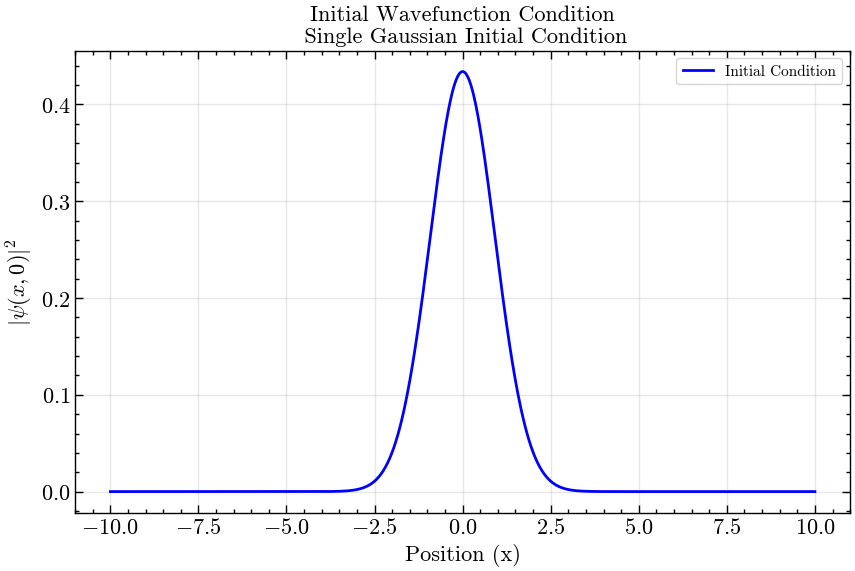

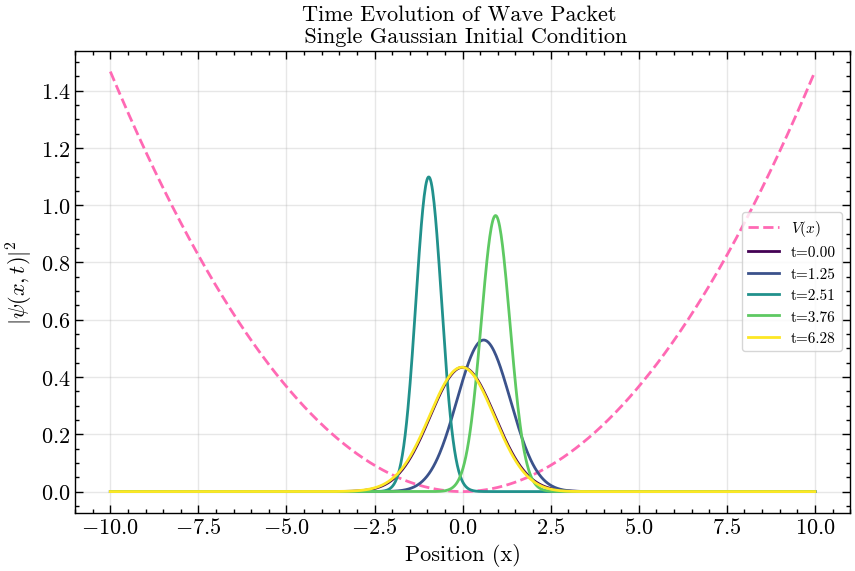

In [8]:
# Instantiate the Plotter class
plot_obj_single = Plotter(solver_single, psi_single)

# Plot the initial condition and snapshots
plot_obj_single.plot_initial_condition()
plot_obj_single.plot_snapshots(frames=5)

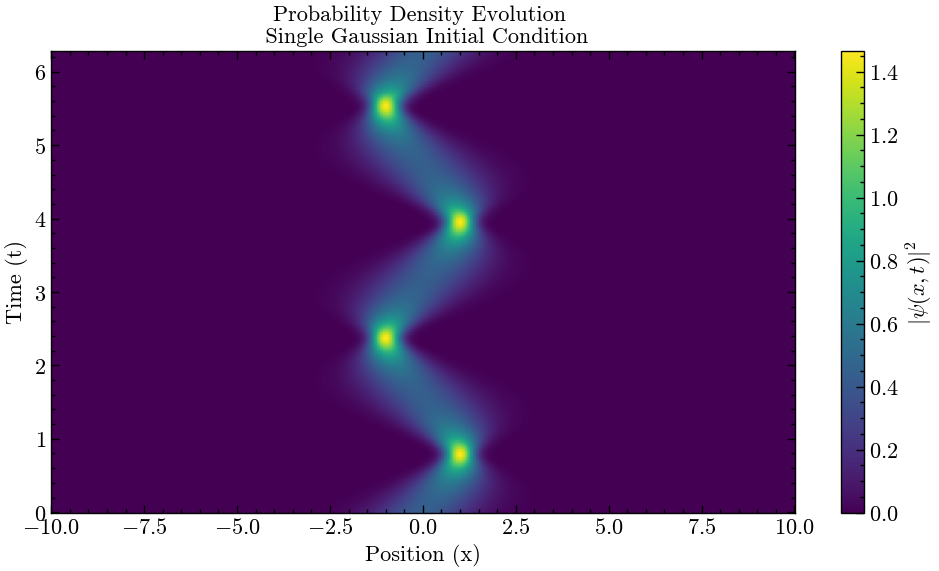

In [9]:
# Plot the 2d map

plot_obj_single.plot_2d_density_map()

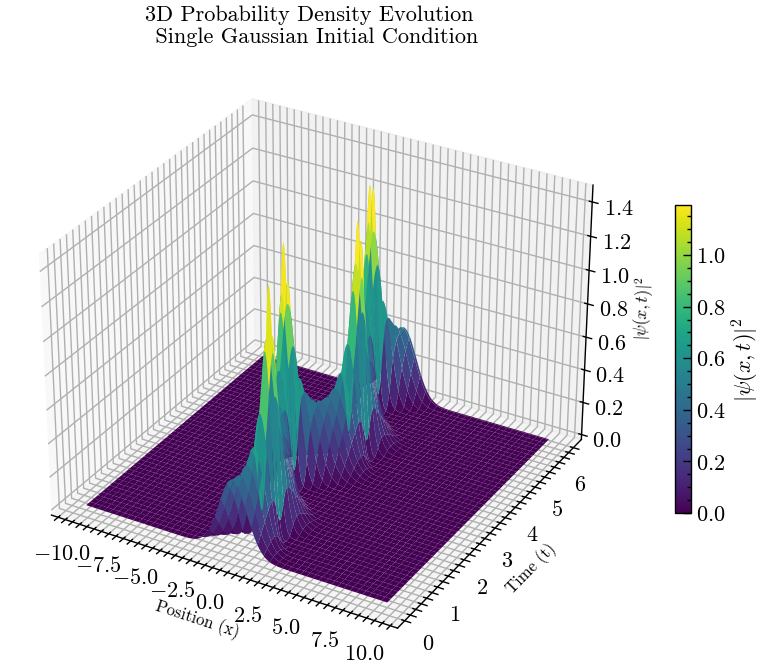

In [10]:
# Plot the 3D density surface

plot_obj_single.plot_3d_density_surface()

In [11]:
# Generate the animated GIF

plot_obj_single.animate()

Directory 'outputfolder' has been created.
Directory 'outputfolder/Single/' has been created.
The image generation is distributed among 4 cores
The movie was generated correctly in 'outputfolder/Single/' as: q_simulation.gif


(c.2) **Double Gaussian Wave Packet** 

In [12]:
# Set intial parameters for intial conditions

p_d = {
    "x0_1": 3.0,
    "x0_2": -3.0,
    "sigma1": 1.,
    "sigma2": 1.,
    "p0_1": 2.0, 
    "p0_2": 2.0}

In [13]:
# Instantiate the QuantumSimulator
solver_double = QuantumSimulator(Lx = 20, Nx = 1000, dt = 0.01, total_time = 2*np.pi, omega = 2.0)

# Setup the initial conditions
solver_double.set_initial_condition(type='Double', params=p_d)

# Solve the Schrodinger equation using Crank-Nicolson method
result_double = SolveCranckNicolson(solver_double)

# Get the solution
psi_double = result_double.solve()

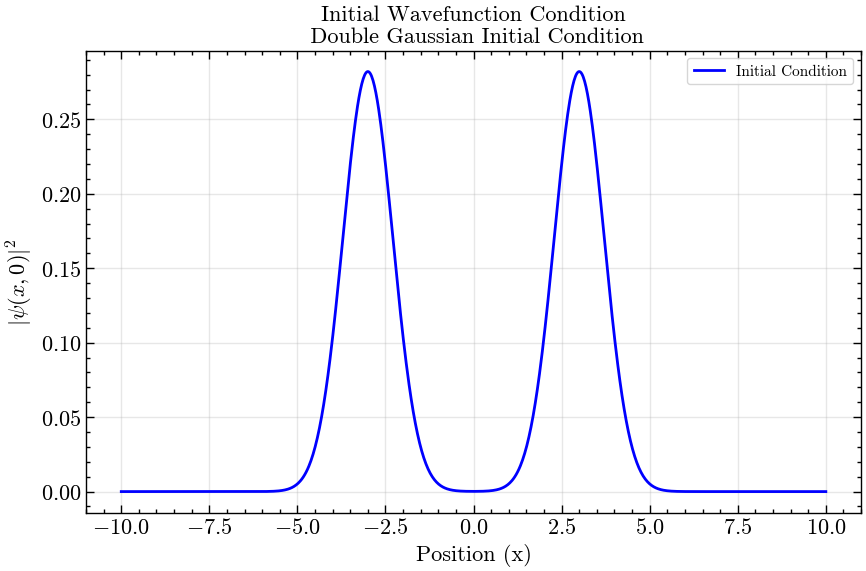

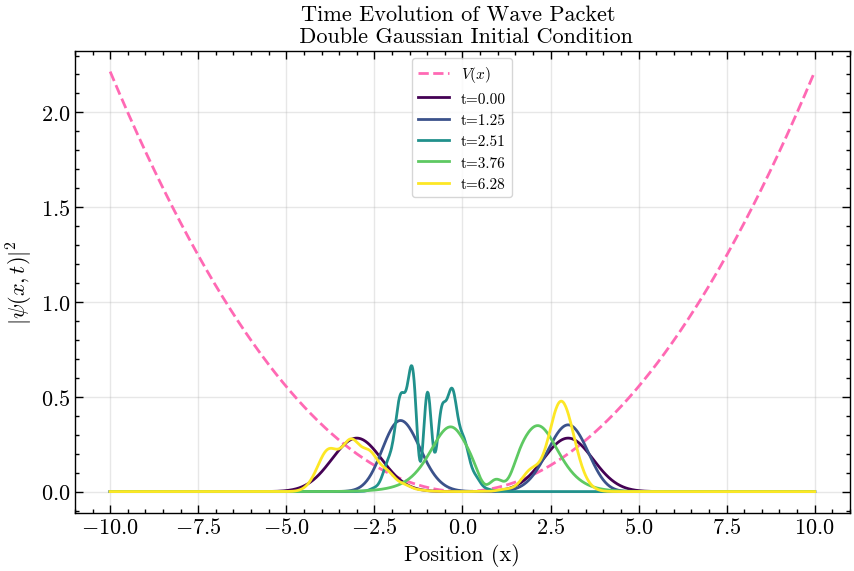

In [14]:
# Plotting

# Instanciate the class
plot_obj_double = Plotter(solver_double, psi_double)

# Plot intial condition
plot_obj_double.plot_initial_condition()

# Plot snapshots
plot_obj_double.plot_snapshots(frames=5)

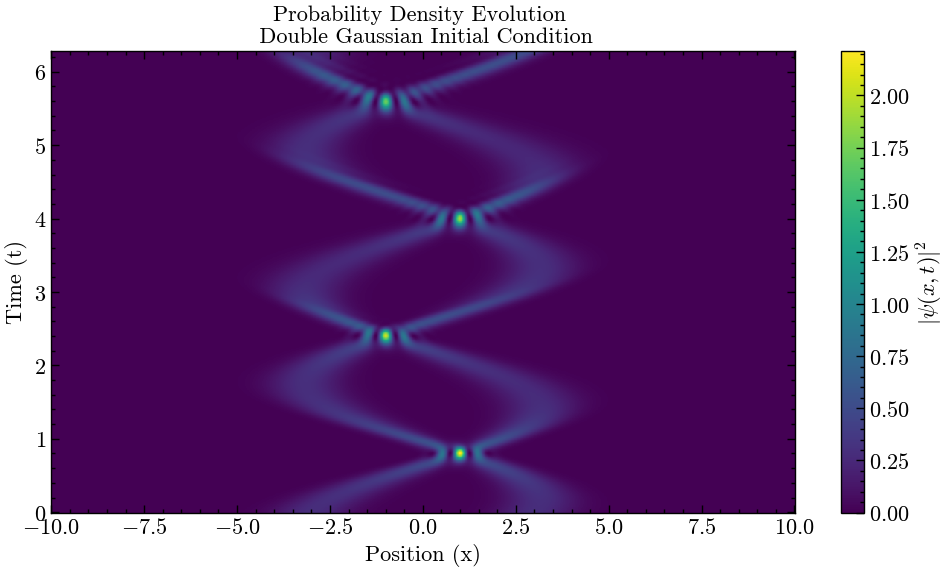

In [15]:
# Plot the 2D map

plot_obj_double.plot_2d_density_map()

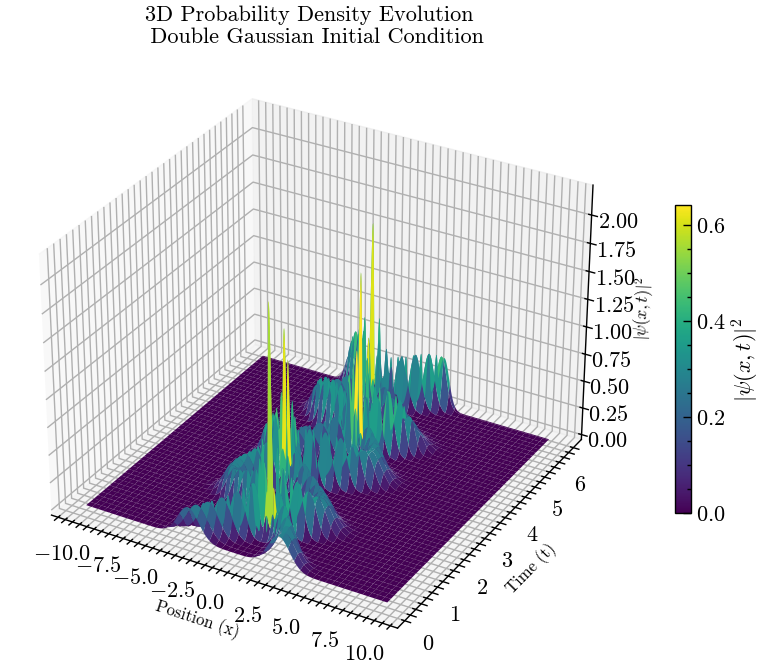

In [16]:
# Plot the 3D density surface

plot_obj_double.plot_3d_density_surface()

In [17]:
# Generate the animated GIF

plot_obj_double.animate()

Directory 'outputfolder' already exists.
Directory 'outputfolder/Double/' has been created.
The image generation is distributed among 4 cores
The movie was generated correctly in 'outputfolder/Double/' as: q_simulation.gif


#### (d) Analysis:

(d.1) Compare the dynamics of the single Gaussian wave packet versus the superposition of two Gaussians. In particular, discuss what phenomena occur when the two Gaussian components of the superposition interact.

- The dynamics of the Gaussian wave packets are clear. They oscillate within the spatial domain due to the quadratic potential, with a period of $2\pi / \omega$. (In both simulations, two time periods were considered.) This phenomenon is most clearly observed in the single Gaussian wave packet.

- The single wave packet maintains a single-peaked profile over time. However, it is observed to spread out over a certain time interval before refocusing again.

- The double wave packet also oscillates, but in this case, both wave packets move toward each other. This interaction produces an interference pattern with maximum density at points of constructive interference. The probability density evolution map highlights the regions where constructive interference occurs between the wave packets.

(d.2) Calculate and report the total probability (norm) $\sum_j |\Psi_j^{N_t}|^2 \Delta x$ at the final time step of each simulation. Compare it to the initial norm. Discuss if the Crank-Nicolson method conserves the norm, and why small deviations might still occur in practice.

In [18]:
# Final  total probability 

# Single wave packet 
norm_single = np.sum(np.abs(psi_single[:,-1])**2) * solver_single.dx
print(f"Final: Total probability for single wave packet: {norm_single}")

# Double wave packet
norm_double = np.sum(np.abs(psi_double[:,-1])**2) * solver_double.dx
print(f"Final: Total probability for double wave packet: {norm_double}")

# Initial total probability 

# Single wave packet 
norm_single_0 = np.sum(np.abs(psi_single[:,0])**2) * solver_single.dx
print(f"Initial: Total probability for single wave packet: {norm_single_0}")

# Double wave packet
norm_double_0 = np.sum(np.abs(psi_double[:,-1])**2) * solver_double.dx
print(f"Initial: Total probability for double wave packet: {norm_double_0}")

Final: Total probability for single wave packet: 1.0000000000000453
Final: Total probability for double wave packet: 1.0000000000000582
Initial: Total probability for single wave packet: 0.9999999999999998
Initial: Total probability for double wave packet: 1.0000000000000582


In [19]:
# Percentaje lost of probability
print(f"Percentaje lost of probability for single wave packet: {100*(norm_single_0 - norm_single)/norm_single_0}%")
print(f"Percentaje lost of probability for double wave packet: {100*(norm_double_0 - norm_double)/norm_double_0}%")

Percentaje lost of probability for single wave packet: -4.551914400963143e-12%
Percentaje lost of probability for double wave packet: 0.0%


With the reported results, it is evident that the Crank–Nicolson method effectively conserves the norm. In the case of the single wave packet, a very small deviation is observed, but it is practically zero as in the double wave packet case. Small deviations can still occur in practice when the numerical scale approaches the limits of machine epsilon, i.e., due to floating-point errors. Since the method updates the solution vector at each time step, the accumulation of such errors can become a problem.